<a href="https://colab.research.google.com/github/AckermanLevi1/Detecting-CO2-variations-using-ML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

<a href='#1'>1. Data Description </a> <br>
<a href='#2'>2. Exploratory Data Analysis </a> <br>
<a href='#3'>3. Modelling </a> <br>


# EXPLORATORY PROJECT ON CO2 EMISSION BY VEHICLES.
# MADE BY:
##  ARYAN BHARGAVA - 21135028


This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset is taken from the kaggle website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features.



    1. Model

4WD/4X4 = Four-wheel drive <br>
AWD = All-wheel drive <br>
FFV = Flexible-fuel vehicle <br>
SWB = Short wheelbase <br>
LWB = Long wheelbase <br>
EWB = Extended wheelbase  <br>

    2. Transmission
A = Automatic <br>
AM = Automated manual <br>
AS = Automatic with select shift <br>
AV = Continuously variable <br>
M = Manual<br>
3 - 10 = Number of gears <br>

    3. Fuel type
X = Regular gasoline <br>
Z = Premium gasoline <br>
D = Diesel <br>
E = Ethanol (E85) <br>
N = Natural gas <br>

Make= Company of the vehicle <br>
Model= Car model <br>
Vehicle Class= Class of vehicle depending on their utility, capacity and weight <br>
Engine Size = Size of engine used in Litre <br>
Cylinders= Number of cylinders <br>
Transmission = Transmission type with number of gears <br>
Fuel type =Type of Fuel used <br>
Fuel Consumption City=Fuel consumption in city roads (L/100 km) <br>
Fuel Consumption Hwy=Fuel consumption in Hwy roads (L/100 km) <br>
Fuel Consumption Comb=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km <br>
Fuel Consumption Comb mpg =The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)<br>


 # <a id='2'> 2.Exploratory Data Analysis</a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df[df["Fuel Type"] == "Z"]
#  If output is numerical then it is a regression  (this case)
# If they are Categorical Problem then it is a classification

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

* Data has only float,object and integer values.<br>


In [ ]:
df.shape

(7385, 12)

* Dataset comprises of 7385 observations and 12 characteristics.<br>


In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

* No column has null/missing values. <br>

In [ ]:
# Drop Duplicated data
df= df.drop_duplicates()
df.shape

(6282, 12)

In [ ]:
df.describe().T # T refers to transpose

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [ ]:
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['CO2 Emissions(g/km)'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Mean Co2 Emission', fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)


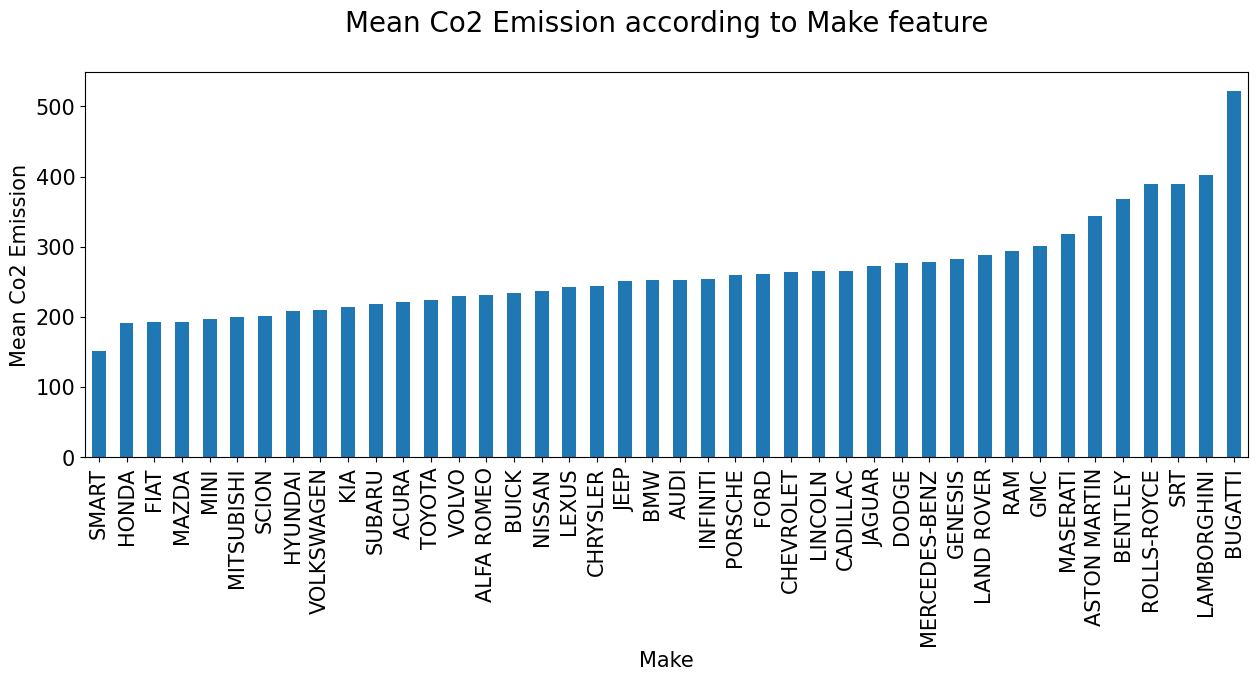

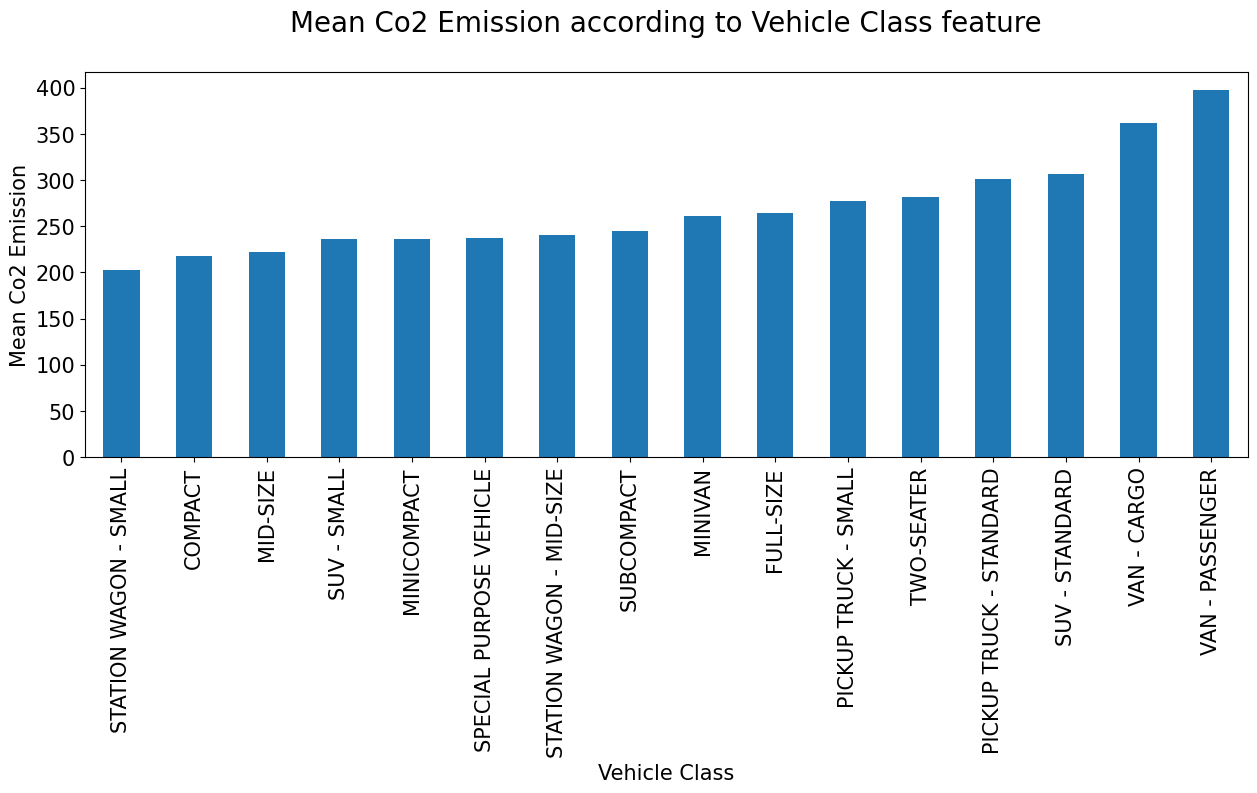

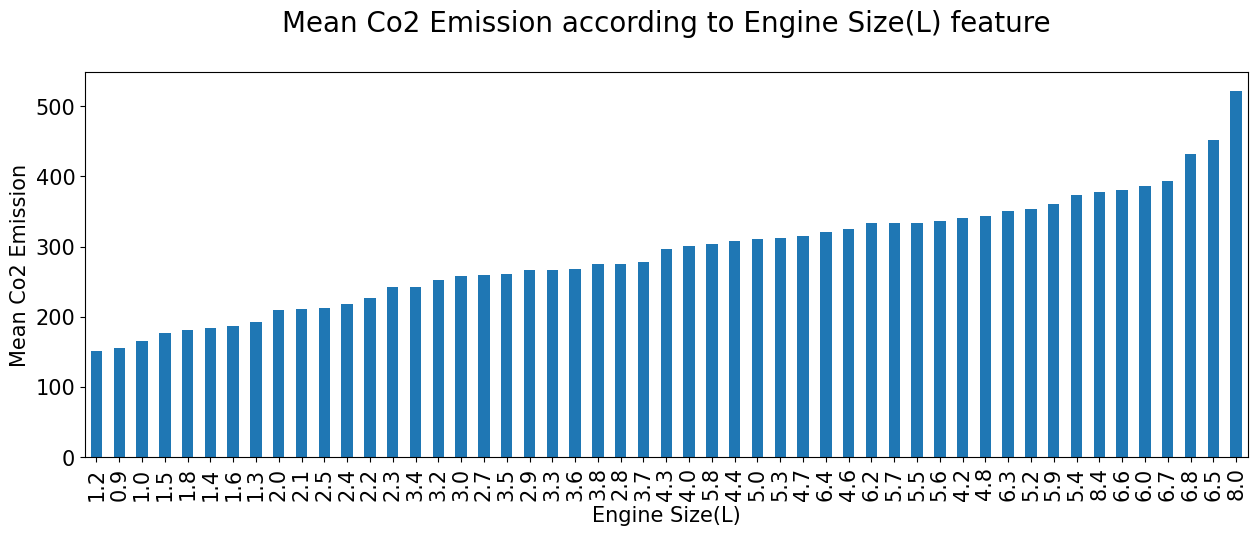

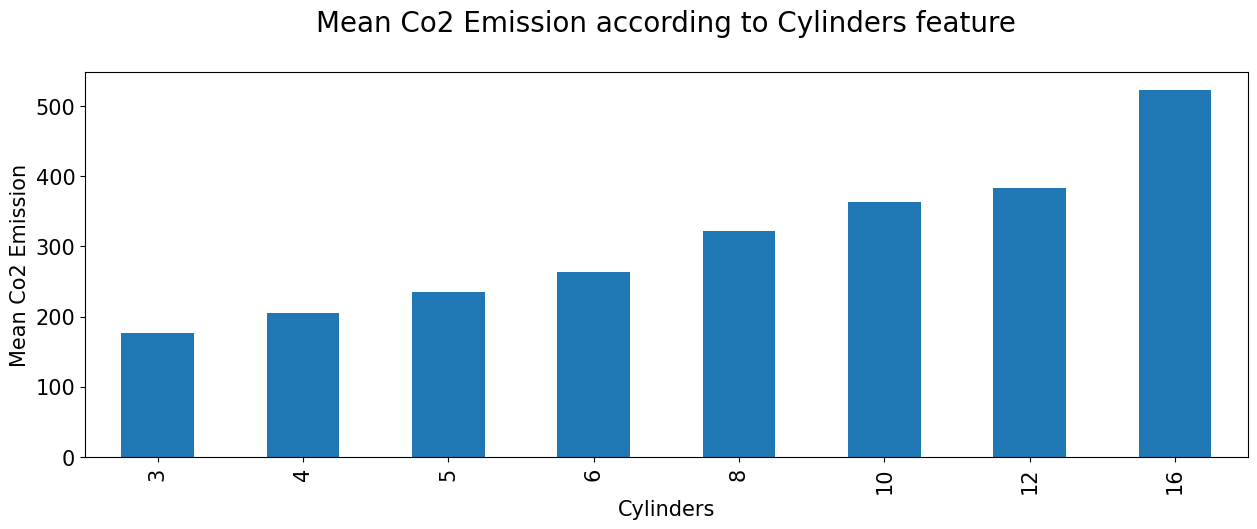

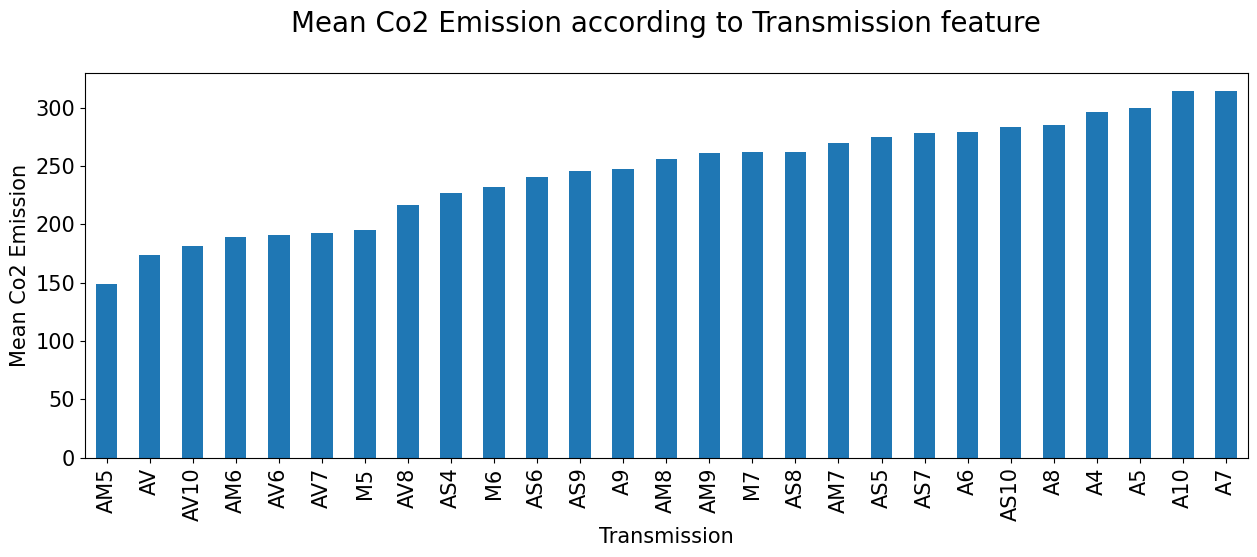

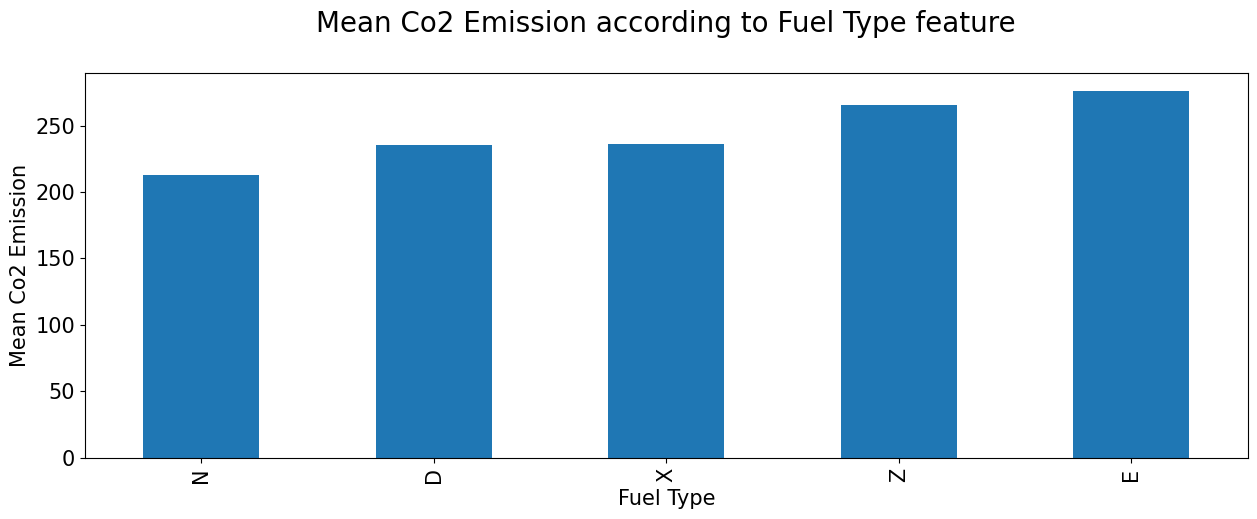

In [ ]:
for feature in ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']:
    explore_cat_feature(feature)

* Engine Size and Cylinders have a clear effect in increasing Co2 Emission
* Co2 Emission also differs with Make, Vehicle Class and Transmission
* Fuel Type has a small effect on Co2 Emission

In [ ]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(df[feature], df['CO2 Emissions(g/km)'])
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Co2 Emission', fontsize=15);
    plt.title(" Co2 Emission vs. {} \n".format(feature), fontsize=20)

<BarContainer object of 6282 artists>

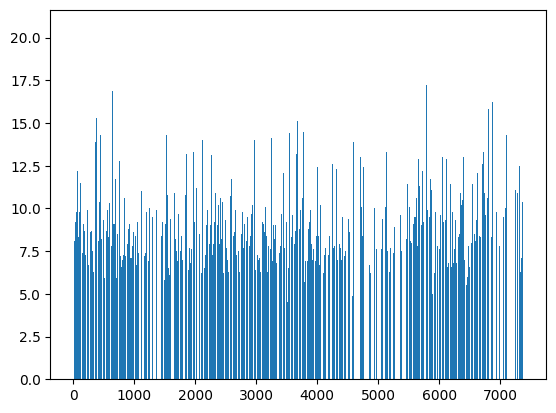

In [ ]:
plt.bar(df.index, df["Fuel Consumption Hwy (L/100 km)"])
# Here we cant make a bar graph because of no relevance

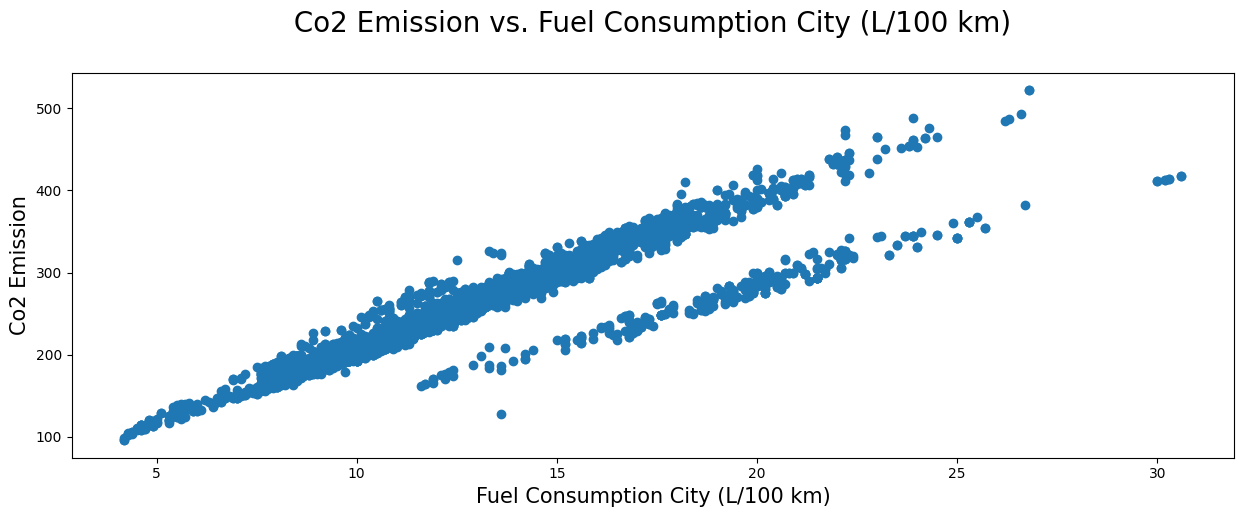

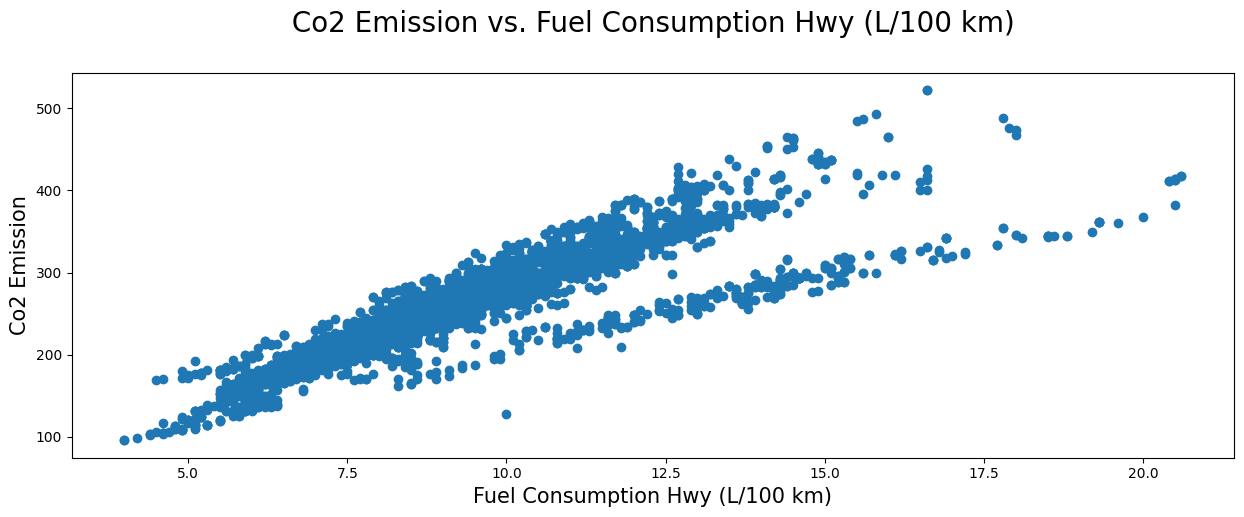

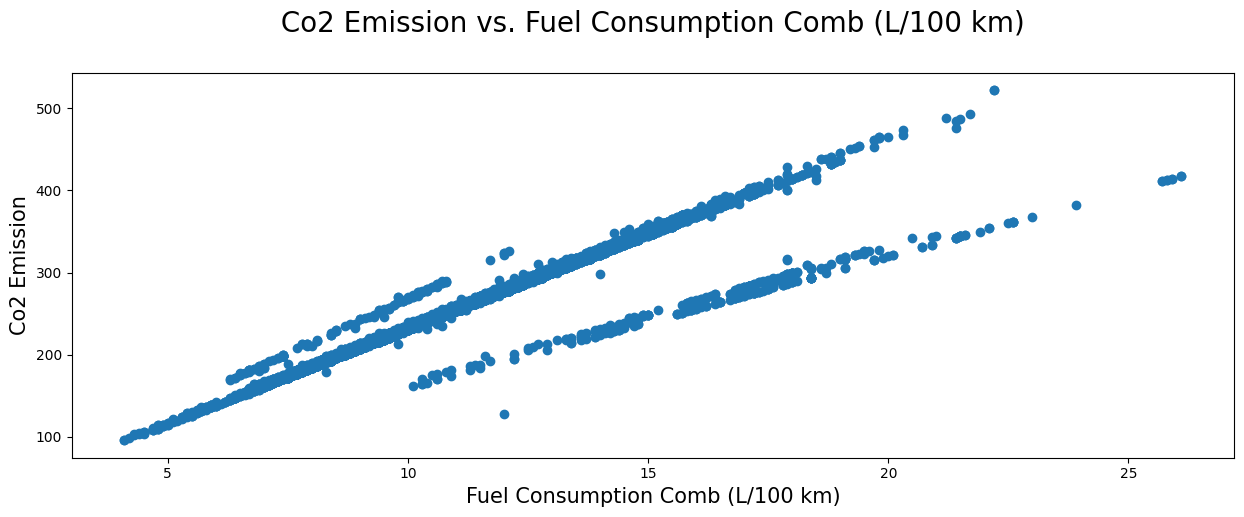

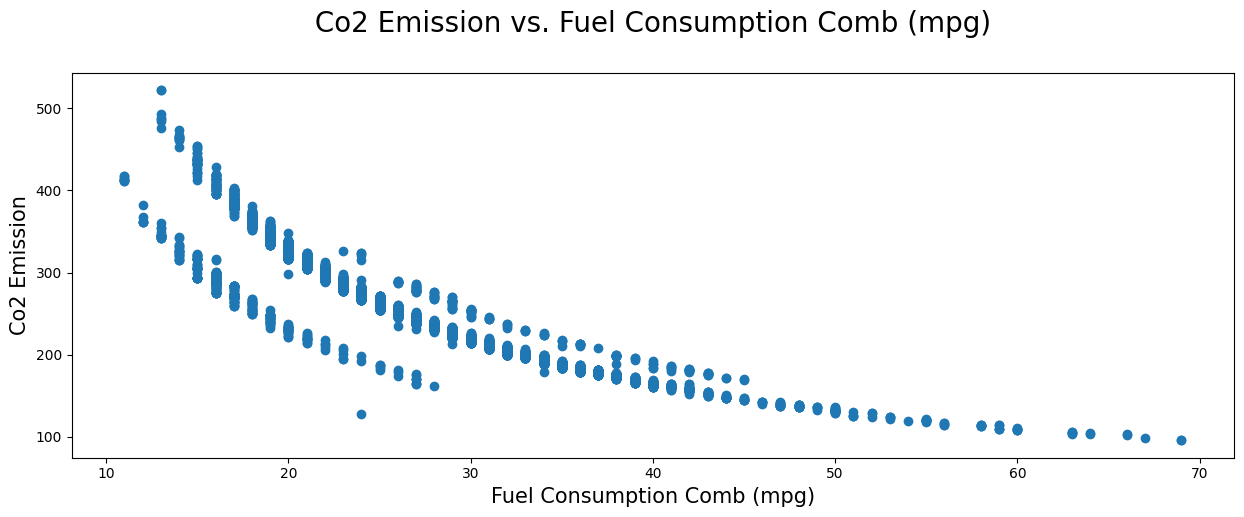

In [ ]:
for feature in ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']:
    explore_num_feature(feature)

* Emission increases with increase in Fuel Consumption (City, Hwy, Comb (L/100km))
* Emission decreases with increase in Fuel Consumption Comb (mpg)

In [ ]:
df.corr()
# Correlation between various Features

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


 # <a id='3'> 3.Modelling</a>

## Build A Simple Model

In [ ]:
df2 = df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)', 'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
X = df2.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df2["CO2 Emissions(g/km)"]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Training Accuracy: ', lin_reg.score(X_train, y_train))
print('Testing Accuracy: ', lin_reg.score(X_test, y_test))
# Accuracy in classification
# R2 score in regression (analogous to accuracy)
# total variance explained by model) / total variance.”
# So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

Training Accuracy:  0.8786148666395369
Testing Accuracy:  0.8786783058892105


> **Consider All Features**
### Handling Categorical Features

In [ ]:
df3= pd.get_dummies(df, drop_first=True)
df3.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print('Training Accuracy: ', rf.score(X_train, y_train)*100)
print('Testing Accuracy: ', rf.score(X_test, y_test)*100)
print('Root Mean Squared Error: ', rmse)

Training Accuracy:  98.98811794835987
Testing Accuracy:  97.16591590111994
Root Mean Squared Error:  10.148255900078155


## KNN REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print('Training Accuracy: ', knn.score(X_train, y_train)*100)
print('Testing Accuracy: ', knn.score(X_test, y_test)*100)
print('Root Mean Squared Error: ', rmse)

Training Accuracy:  97.83162256605773
Testing Accuracy:  97.44646658505118
Root Mean Squared Error:  9.63287258535601


## XG BOOST

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print('Training Accuracy: ', xgb.score(X_train, y_train)*100)
print('Testing Accuracy: ', xgb.score(X_test, y_test)*100)
print('Root Mean Squared Error: ', rmse)

Training Accuracy:  99.05528836139756
Testing Accuracy:  97.67324120121668
Root Mean Squared Error:  9.19519038524411


In [ ]:
df = pd.DataFrame({
    "MODELS":["RANDOM FOREST REGRESSOR", "KNN REGRESSOR","XG BOOST REGRESSOR"],
    "TEST ACCURACY SCORES":[ 99.40108878813011,98.92056973039544, 99.48525916958401],
    "TEST RMSE":[4.665157010025108,  6.262998958296509,4.324932688316165]

})
df

,MODELS,TEST ACCURACY SCORES,TEST RMSE
0,RANDOM FOREST REGRESSOR,99.401089,4.665157
1,KNN REGRESSOR,98.920570,6.262999
2,XG BOOST REGRESSOR,99.485259,4.324933


## **We got +99% Accuracy in average Using Random Forest, KNN and XG Boost**